# More Classification & Evaluation

In this exercise we will look at classification again and have a closer look at evaluation.

In [1]:
import pandas as pd
from sklearn import preprocessing

# load the data
iris = pd.read_csv("iris.csv")
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]

label_encoder = preprocessing.LabelEncoder()
iris_target = label_encoder.fit_transform(iris['Name'])

display(iris_data.head())
iris_target[:5]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([0, 0, 0, 0, 0])

## Cross Validation

[Cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) splits your dataset into n *folds* and then runs the learning and evaluation n times.
This gives you a better estimate of the actual performance of your classifier than a single train/test split.

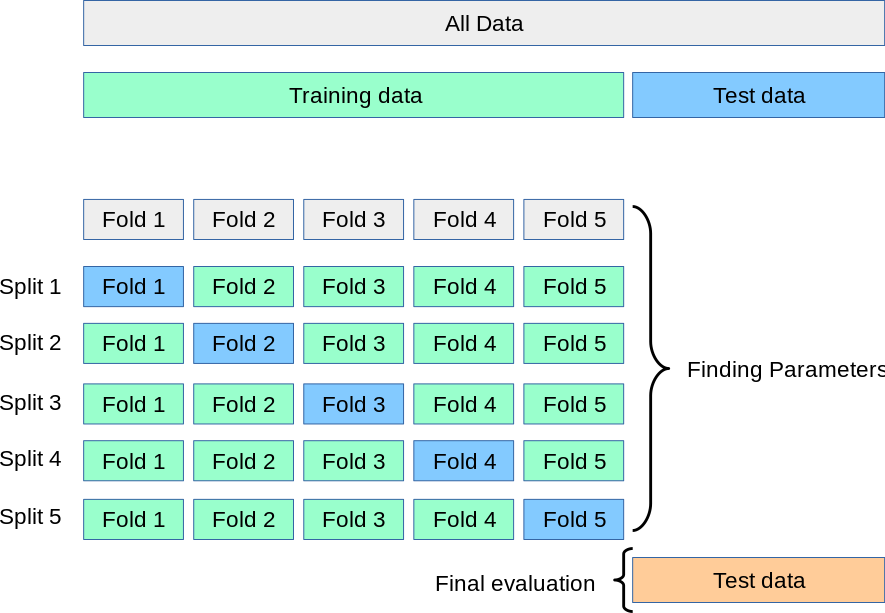

https://scikit-learn.org/stable/modules/cross_validation.html

You can evaluate any estimator with cross validation by importing the [```cross_val_score()``` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).
You specify the [evaluation measure](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) using the `scoring` parameter.
Possible values are 'accuracy', 'f1_micro', or 'f1_macro', etc.
The return value contains the score for every fold.

Note: The ```cross_val_score()``` function only evaluates the estimator on your dataset, it does not produce a model that you can apply!
To create such a model you must still call the ```fit()``` function of your estimator!

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

accuracy_iris = cross_val_score(dt, iris_data, iris_target, cv=10, scoring='accuracy')

for i, acc in enumerate(accuracy_iris):
    print("Fold {}: Accuracy = {}%".format(i, acc * 100.0))

print("Average Accuracy = {}%".format(accuracy_iris.mean() * 100.0))

Fold 0: Accuracy = 100.0%
Fold 1: Accuracy = 93.33333333333333%
Fold 2: Accuracy = 100.0%
Fold 3: Accuracy = 93.33333333333333%
Fold 4: Accuracy = 93.33333333333333%
Fold 5: Accuracy = 86.66666666666667%
Fold 6: Accuracy = 93.33333333333333%
Fold 7: Accuracy = 93.33333333333333%
Fold 8: Accuracy = 100.0%
Fold 9: Accuracy = 100.0%
Average Accuracy = 95.33333333333334%


### Stratified Sampling in Cross Validation

You can control how the folds are created by changing the ```cv``` parameter.
Stratified sampling is implemented in the [```StatifiedKFold``` class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html).

In [3]:
from sklearn.model_selection import StratifiedKFold

cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_iris = cross_val_score(dt, iris_data, iris_target, cv=cross_val, scoring='accuracy')
accuracy_iris.mean()

0.9400000000000001

### Obtaining predictions by cross-validation

If you want to analyse the predictions made during cross validation (for error analysis, you don't apply cross validation when actually applying the model!), you can use the [```cross_val_predict()``` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html).
Note: As the folds of a cross validation are non-overlapping, you get exactly one prediction for every example in your dataset.

In [4]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(dt, iris_data, iris_target, cv=10)

display(predicted)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Balancing

If the classes in your training set are highly imbalanced, this can affect the model that is learned, as a much higher importance is given to the frequent class (also called majority class).
To prevent this, you can use balancing to change the class distribution **on the training set** (and only there!).

Methods for balancing are provided by the [imblearn package](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.pipeline.Pipeline.html):
- Undersampling of majority class: For example using the [```RandomUnderSampler``` class](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html)
- Oversampling of the minority class(es): For example using the [```RandomOverSampler``` class](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html)

Every sampler from this package provides a ```fit_resample()``` function that balances the data.

To find out if your data is imbalanced, it can be useful to plot the class distribution:

Note: you may need to restart the kernel to use updated packages.


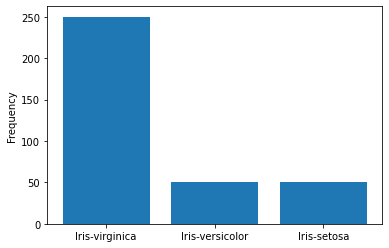

In [5]:
%pip install -q -U imbalanced-learn
import matplotlib.pyplot as plt

iris = pd.read_csv("iris_imbalanced.csv")
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris_target = iris['Name']

class_dist = iris_target.value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

The plot shows that the class 'Iris-virginica' is much more frequent than the other two classes.
We can balance the data using undersampling of this majority class:

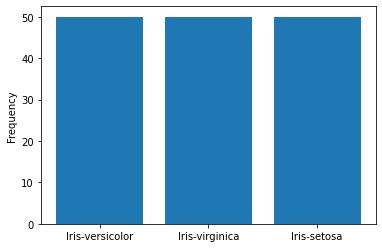

In [6]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler()
iris_balanced_data, iris_balanced_target = sampler.fit_resample(iris_data, iris_target)

class_dist = pd.Series(iris_balanced_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

As an alternative to undersampling, we can also choose to oversample the minority classes:

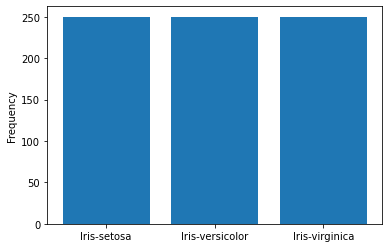

In [7]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
iris_balanced_data, iris_balanced_target = sampler.fit_resample(iris_data, iris_target)

class_dist = pd.Series(iris_balanced_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

### Evaluation Measures: Precision and Recall
- Measure two aspects of the result for every class
- Precision: How many of the examples that were labelled “yes” are really “yes”?
    - “the number of correctly labelled examples divided by the number of all examples that were labelled with this class”
- Recall: How many of the examples that are really “yes” were labelled “yes’?
    - “the number of correctly labelled examples divided by the number of all examples that actually belong to this class”
- F1 score: considers both precision and recall (harmonic mean) 

$Precision = \frac{TP}{TP+\textbf{FP}}$
$Recall = \frac{TP}{TP+\textbf{FN}}$

$F1 = \frac{2 * precicion * recall}{precision + recall}$

In [8]:
from sklearn.neighbors import KNeighborsClassifier
predicted = cross_val_predict(KNeighborsClassifier(3), iris_data, iris_target, cv=10)

from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(iris_target, predicted, target_names=label_encoder.classes_))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      0.94      0.97        50
 Iris-virginica       0.99      1.00      0.99       250

       accuracy                           0.99       350
      macro avg       1.00      0.98      0.99       350
   weighted avg       0.99      0.99      0.99       350



### Manual Cross Validation 
If you want to implement cross validation yourself, you can iterate over the folds manually:

In [9]:
# sometimes you have to use the raw array and not the pandas dataframe (access it with .values)
data = iris_data.values 
target = iris['Name']

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_indices, test_indices in cv.split(data, target):
    display(test_indices)
    
    train_data = data[train_indices]
    train_target = target[train_indices]
    
    dt.fit(train_data, train_target)

    test_data = data[test_indices]
    test_target = target[test_indices]
    
    test_prediction = dt.predict(test_data)

array([ 11,  14,  25,  33,  35,  52,  59,  65,  87,  97, 111, 124, 149,
       153, 156, 160, 161, 163, 170, 171, 185, 195, 196, 200, 205, 220,
       224, 234, 245, 267, 292, 308, 315, 334, 342])

array([ 13,  15,  20,  29,  45,  78,  85,  92,  94,  99, 100, 101, 138,
       140, 141, 147, 186, 199, 201, 210, 235, 253, 276, 278, 284, 293,
       294, 306, 311, 321, 327, 331, 338, 339, 344])

array([  0,  10,  31,  40,  47,  58,  68,  74,  80,  90, 102, 104, 131,
       132, 145, 157, 162, 166, 193, 203, 218, 228, 233, 237, 238, 243,
       260, 262, 275, 286, 290, 300, 302, 329, 335])

array([  4,   9,  19,  21,  42,  60,  75,  82,  89,  96, 110, 118, 127,
       129, 133, 150, 164, 168, 176, 183, 198, 202, 208, 226, 227, 230,
       231, 242, 273, 277, 288, 301, 307, 326, 348])

array([ 22,  34,  38,  41,  44,  56,  64,  66,  70,  71, 106, 116, 120,
       125, 139, 144, 148, 154, 173, 177, 180, 191, 194, 212, 216, 257,
       259, 268, 271, 279, 305, 312, 319, 324, 343])

array([  6,   7,  27,  30,  48,  50,  72,  83,  95,  98, 112, 113, 115,
       117, 121, 137, 158, 178, 181, 192, 223, 239, 240, 246, 252, 272,
       274, 282, 296, 298, 310, 313, 316, 337, 347])

array([  2,   8,  23,  24,  28,  61,  63,  67,  69,  91, 105, 126, 130,
       189, 204, 209, 213, 215, 222, 225, 232, 241, 244, 250, 256, 261,
       265, 285, 291, 295, 318, 325, 330, 333, 346])

array([  1,  12,  32,  37,  49,  51,  55,  79,  84,  88, 109, 119, 122,
       123, 135, 136, 142, 143, 146, 159, 169, 175, 184, 188, 214, 217,
       221, 248, 258, 263, 280, 281, 289, 303, 320])

array([ 16,  26,  36,  39,  46,  57,  73,  76,  77,  93, 103, 107, 108,
       114, 134, 152, 167, 182, 197, 207, 219, 229, 249, 251, 264, 266,
       270, 299, 304, 309, 317, 322, 323, 328, 336])

array([  3,   5,  17,  18,  43,  53,  54,  62,  81,  86, 128, 151, 155,
       165, 172, 174, 179, 187, 190, 206, 211, 236, 247, 254, 255, 269,
       283, 287, 297, 314, 332, 340, 341, 345, 349])

## Visual Evaluation

To evaluate and compare different classifiers, it can be useful to look at the ROC Curves.
You can create these curves using the [```roc_curve()``` function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).
As the ROC Curves depend on the confidences of each prediction made by the classifier, you need to call the ```predict_proba()``` function, which returns the confidence values for each class, instead of the ```predict()``` function, which returns the actual prediction.

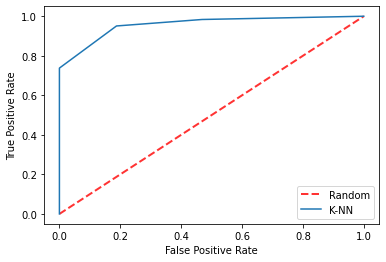

In [10]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv('weighting.csv')
target = data['weighting.dat (7)']
data = data.drop(columns='weighting.dat (7)')

# create the classifier
knn_estimator = KNeighborsClassifier(3)

# create a train/test split
data_train, data_test, target_train, target_test = train_test_split(data, target)

# fit to the training data
knn_estimator.fit(data_train, target_train)

# get the class probabilities (confidences) for the test set
proba_for_each_class = knn_estimator.predict_proba(data_test)

# calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(target_test, proba_for_each_class[:,1], pos_label='positive')

# plot the line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# plot the ROC Curve for the classifier
plt.plot(fpr,tpr,label='K-NN')

# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show() 

### ROC Curves with Cross Validation

To draw ROC Curves for the results of a cross validation, you can use the following function:

In [11]:
from numpy import interp
from sklearn.metrics import roc_curve, auc
import numpy as np

def avg_roc(cv, estimator, data, target, pos_label):
    mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]
    tprs = []
    aucs = []    
    for train_indices, test_indices in cv.split(data, target):
        train_data, train_target = data[train_indices], target[train_indices]
        estimator.fit(train_data, train_target)
        
        test_data, test_target = data[test_indices], target[test_indices]
        decision_for_each_class = estimator.predict_proba(test_data)
        fpr, tpr, thresholds = roc_curve(test_target, decision_for_each_class[:,1], pos_label=pos_label)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0 # tprs[-1] accesses the last element
        aucs.append(auc(fpr, tpr))
        # plt.plot(fpr, tpr)  # plot for each fold
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0 # set the last tpr to 1
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    return mean_fpr, mean_tpr, mean_auc, std_auc

You apply this function as follows:

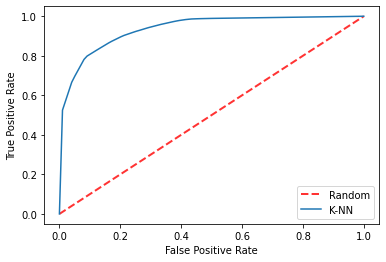

In [12]:
# create the classifier
knn_estimator = KNeighborsClassifier(3)

# specify how to create the folds for the cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42, )

# run cross validation and calculate the ROC Curve
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, knn_estimator, data.values, target, 'positive')

# plot the line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# plot the ROC Curve for the classifier
plt.plot(mean_fpr, mean_tpr, label='K-NN')

# show the plot
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()